# Exploratory Data Analysis - IMDB Movie Reviews

**Group 9 - Text Classification Project**  
**Dataset:** IMDB Movie Reviews (Sentiment Classification)  
**Member:** Member 1 (Logistic Regression)

## Objectives:
1. Load and understand the IMDB dataset structure
2. Analyze text characteristics (length, vocabulary)
3. Explore class distribution
4. Visualize common words and patterns
5. Identify preprocessing requirements

**Note:** This notebook generates 4+ visualizations required for the assignment.

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load IMDB Dataset

In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/IMDB Dataset.csv')

print(f"Dataset loaded successfully!")
print(f"\nShape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!

Shape: (50000, 2)
Columns: ['review', 'sentiment']

First few rows:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## 3. Dataset Information & Statistics

In [3]:
# Basic information
print("="*60)
print("DATASET INFORMATION")
print("="*60)
print(f"\nTotal reviews: {len(df):,}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nDuplicate rows: {df.duplicated().sum():,}")
print("="*60)

DATASET INFORMATION

Total reviews: 50,000
Columns: ['review', 'sentiment']

Data types:
review       object
sentiment    object
dtype: object

Missing values:
review       0
sentiment    0
dtype: int64

Duplicate rows: 418


## 4. Visualization #1: Class Distribution Analysis

**Requirement: 4+ visualizations needed for exemplary grade**


Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Percentage:
sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64


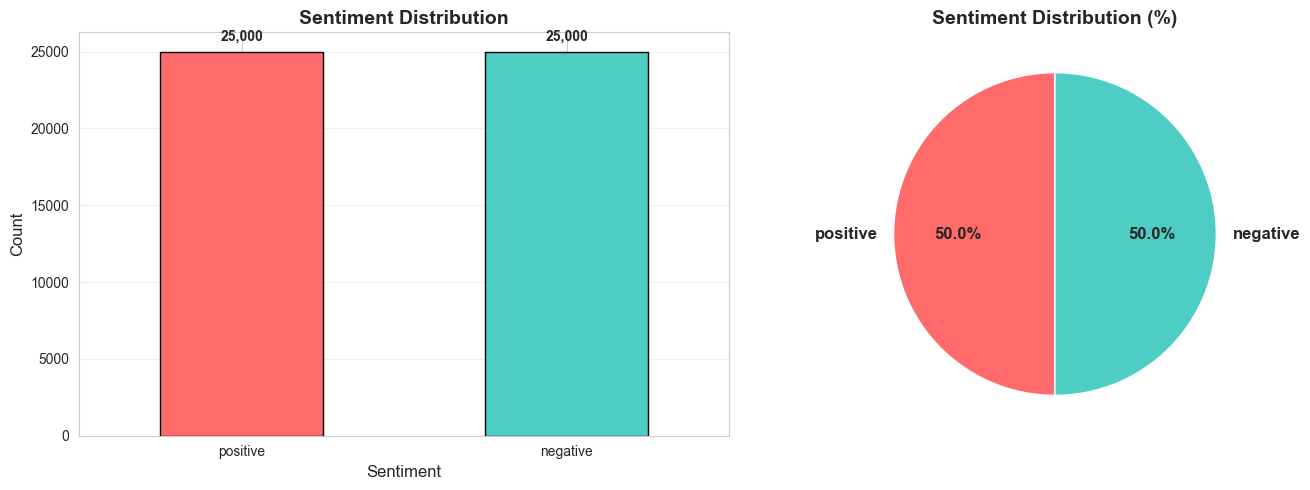


Visualization #1 saved to: figures/eda/class_distribution.png


In [4]:
# Class distribution
sentiment_counts = df['sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)
print(f"\nPercentage:")
print(df['sentiment'].value_counts(normalize=True) * 100)

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sentiment_counts.plot(kind='bar', ax=axes[0], color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
axes[0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(sentiment_counts):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
            colors=['#ff6b6b', '#4ecdc4'], startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Sentiment Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/eda/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization #1 saved to: figures/eda/class_distribution.png")

## 5. Visualization #2: Text Length Analysis


REVIEW LENGTH STATISTICS
             count       mean         std   min    25%    50%    75%     max
sentiment                                                                   
negative   25000.0  229.46456  164.947795   4.0  128.0  174.0  278.0  1522.0
positive   25000.0  232.84932  177.497046  10.0  125.0  172.0  284.0  2470.0


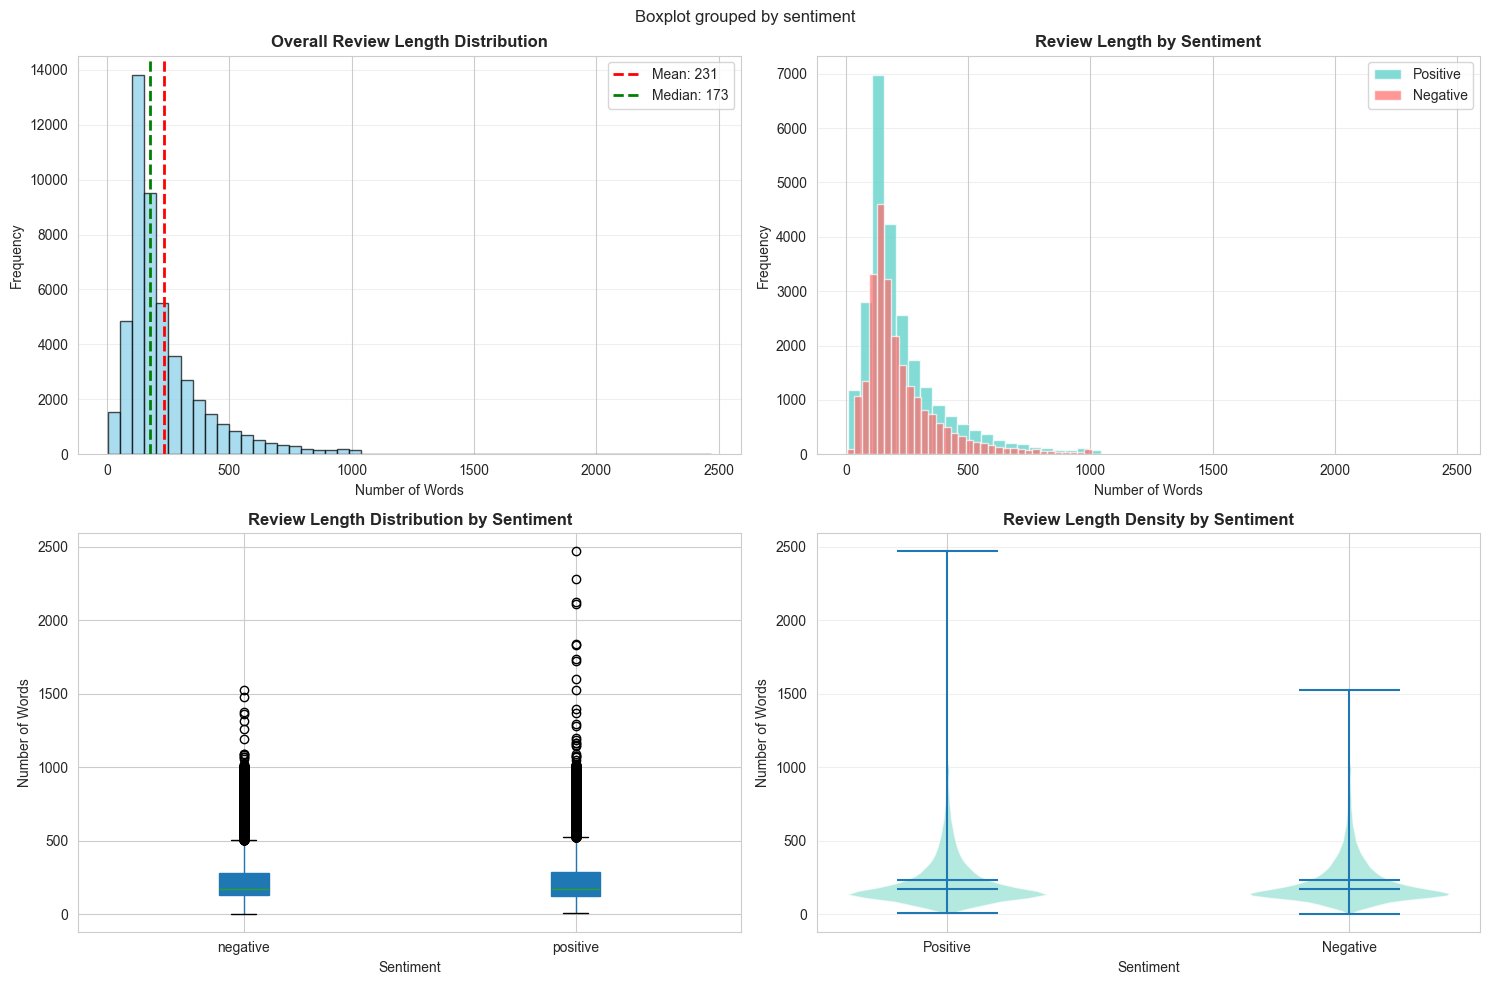


Visualization #2 saved to: figures/eda/text_length_analysis.png


In [5]:
# Calculate text lengths
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Statistics by sentiment
print("\n" + "="*60)
print("REVIEW LENGTH STATISTICS")
print("="*60)
print(df.groupby('sentiment')['review_length'].describe())
print("="*60)

# Visualize text length distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Overall distribution
axes[0, 0].hist(df['review_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Overall Review Length Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Words', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].axvline(df['review_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["review_length"].mean():.0f}')
axes[0, 0].axvline(df['review_length'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["review_length"].median():.0f}')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# By sentiment
positive_reviews = df[df['sentiment'] == 'positive']['review_length']
negative_reviews = df[df['sentiment'] == 'negative']['review_length']

axes[0, 1].hist(positive_reviews, bins=50, color='#4ecdc4', alpha=0.7, label='Positive')
axes[0, 1].hist(negative_reviews, bins=50, color='#ff6b6b', alpha=0.7, label='Negative')
axes[0, 1].set_title('Review Length by Sentiment', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Words', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Box plot
df.boxplot(column='review_length', by='sentiment', ax=axes[1, 0], patch_artist=True)
axes[1, 0].set_title('Review Length Distribution by Sentiment', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sentiment', fontsize=10)
axes[1, 0].set_ylabel('Number of Words', fontsize=10)
plt.sca(axes[1, 0])
plt.xticks(rotation=0)

# Violin plot
parts = axes[1, 1].violinplot([positive_reviews, negative_reviews], positions=[1, 2], 
                               showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_facecolor('#95e1d3')
    pc.set_alpha(0.7)
axes[1, 1].set_title('Review Length Density by Sentiment', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Sentiment', fontsize=10)
axes[1, 1].set_ylabel('Number of Words', fontsize=10)
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Positive', 'Negative'])
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/eda/text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization #2 saved to: figures/eda/text_length_analysis.png")

## 6. Sample Reviews

In [6]:
# Display sample reviews
print("\n" + "="*80)
print("SAMPLE POSITIVE REVIEW:")
print("="*80)
print(df[df['sentiment'] == 'positive']['review'].iloc[0][:500] + "...")

print("\n" + "="*80)
print("SAMPLE NEGATIVE REVIEW:")
print("="*80)
print(df[df['sentiment'] == 'negative']['review'].iloc[0][:500] + "...")
print("\n" + "="*80)


SAMPLE POSITIVE REVIEW:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ...

SAMPLE NEGATIVE REVIEW:
Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And 

## 7. Visualization #3: Word Cloud Analysis


Generating word clouds...


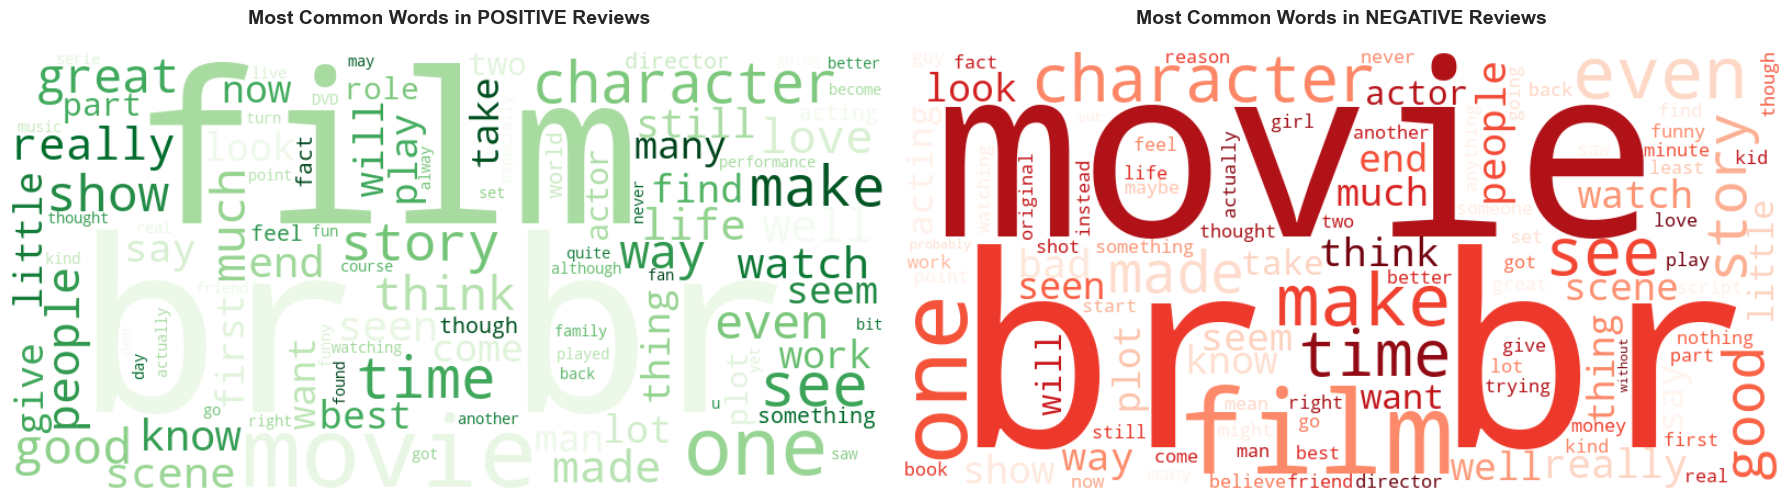


Visualization #3 saved to: figures/eda/wordclouds.png


In [7]:
# Create word clouds for positive and negative reviews
print("\nGenerating word clouds...")
positive_text = ' '.join(df[df['sentiment'] == 'positive']['review'].values)
negative_text = ' '.join(df[df['sentiment'] == 'negative']['review'].values)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Positive word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', 
                          colormap='Greens', max_words=100, 
                          contour_width=2, contour_color='darkgreen').generate(positive_text)
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].set_title('Most Common Words in POSITIVE Reviews', fontsize=14, fontweight='bold', pad=20)
axes[0].axis('off')

# Negative word cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='white',
                          colormap='Reds', max_words=100,
                          contour_width=2, contour_color='darkred').generate(negative_text)
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].set_title('Most Common Words in NEGATIVE Reviews', fontsize=14, fontweight='bold', pad=20)
axes[1].axis('off')

plt.tight_layout()
plt.savefig('../figures/eda/wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization #3 saved to: figures/eda/wordclouds.png")

## 8. Visualization #4: Top Words Analysis


Analyzing top words...


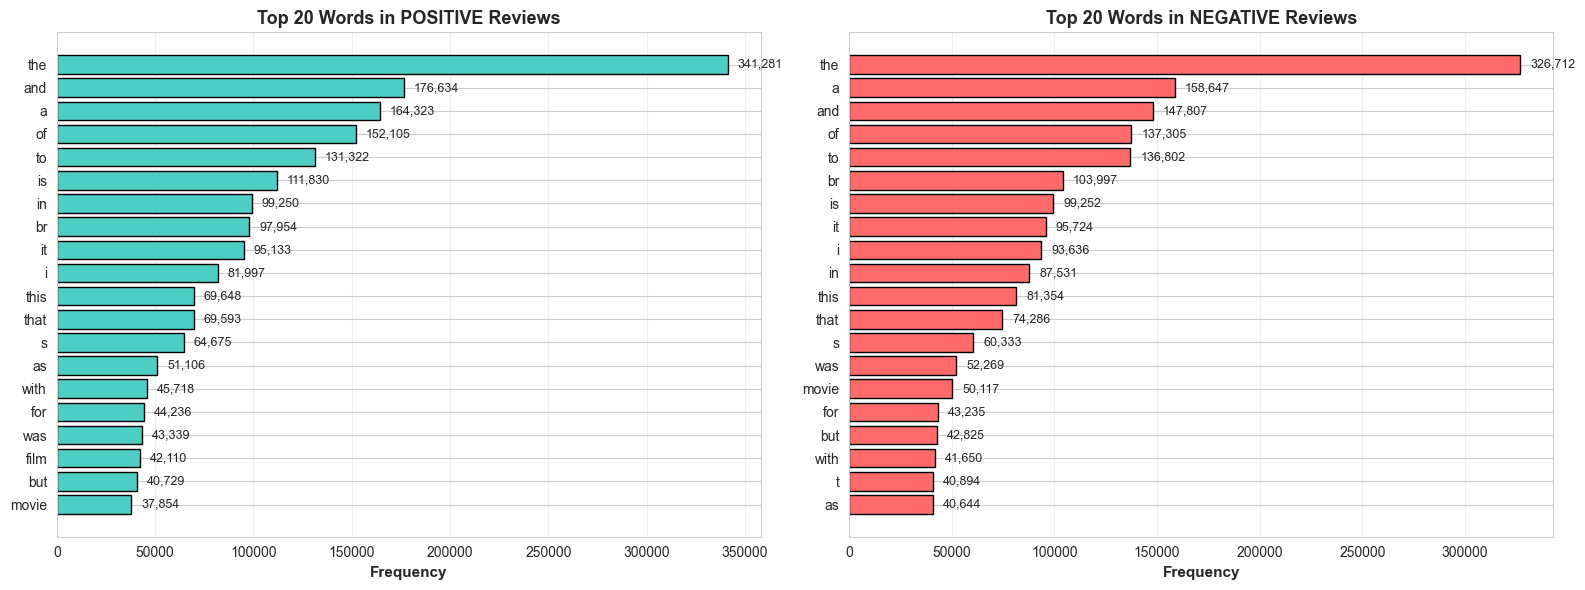


Visualization #4 saved to: figures/eda/top_words.png


In [8]:
def get_top_words(text, n=20):
    """Extract top n most common words"""
    words = re.findall(r'\b[a-z]+\b', text.lower())
    return Counter(words).most_common(n)

# Get top words for each sentiment
print("\nAnalyzing top words...")
top_positive = get_top_words(positive_text, 20)
top_negative = get_top_words(negative_text, 20)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive reviews
words_pos, counts_pos = zip(*top_positive)
axes[0].barh(range(len(words_pos)), counts_pos, color='#4ecdc4', edgecolor='black')
axes[0].set_yticks(range(len(words_pos)))
axes[0].set_yticklabels(words_pos)
axes[0].set_xlabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Top 20 Words in POSITIVE Reviews', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, (word, count) in enumerate(top_positive):
    axes[0].text(count + 5000, i, f'{count:,}', va='center', fontsize=9)

# Negative reviews
words_neg, counts_neg = zip(*top_negative)
axes[1].barh(range(len(words_neg)), counts_neg, color='#ff6b6b', edgecolor='black')
axes[1].set_yticks(range(len(words_neg)))
axes[1].set_yticklabels(words_neg)
axes[1].set_xlabel('Frequency', fontsize=11, fontweight='bold')
axes[1].set_title('Top 20 Words in NEGATIVE Reviews', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, (word, count) in enumerate(top_negative):
    axes[1].text(count + 5000, i, f'{count:,}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../figures/eda/top_words.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization #4 saved to: figures/eda/top_words.png")

## 9. Vocabulary Statistics

In [9]:
# Calculate vocabulary statistics
all_words = []
for text in df['review']:
    words = re.findall(r'\b[a-z]+\b', text.lower())
    all_words.extend(words)

unique_words = set(all_words)

print("\n" + "="*60)
print("VOCABULARY STATISTICS")
print("="*60)
print(f"Total words: {len(all_words):,}")
print(f"Unique words: {len(unique_words):,}")
print(f"Average words per document: {len(all_words) / len(df):.2f}")
print(f"Vocabulary richness: {len(unique_words) / len(all_words):.4f}")
print("="*60)


VOCABULARY STATISTICS
Total words: 11,893,453
Unique words: 98,751
Average words per document: 237.87
Vocabulary richness: 0.0083


## 10. Key Findings & Summary

### Summary:
1. **Dataset Size:** 50,000 movie reviews (perfectly balanced)
2. **Class Distribution:** 50% positive, 50% negative (balanced dataset)
3. **Text Length:** Varies significantly, with some very long reviews
4. **Common Words:** Both sentiments share many common words (the, and, a, etc.)
5. **Data Quality:** No missing values, clean dataset

### Preprocessing Requirements:
- Remove HTML tags and special characters
- Lowercase conversion
- Remove stopwords for better feature extraction
- Handle punctuation appropriately
- Consider review length normalization

### Embedding-Specific Considerations:
- **TF-IDF**: Remove stopwords, use n-grams (1,2)
- **GloVe**: Keep stopwords, handle out-of-vocabulary words
- **Word2Vec**: Keep stopwords, train on corpus vocabulary

### Next Steps:
1. Implement preprocessing pipeline
2. Create embeddings (TF-IDF, GloVe, Word2Vec)
3. Train Logistic Regression models
4. Compare performance across embeddings

---

## Assignment Requirements Met:
- **4+ Visualizations**: Yes (Class distribution, Text length, Word clouds, Top words)
- **Dataset statistics**: Yes
- **Class balance analysis**: Yes
- **Text patterns identified**: Yes
- **Preprocessing strategy**: Yes